In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
with open('../Tutorials/data/hygfull.csv') as f:
    print (f.read(440) + '...')

StarID,Hip,HD,HR,Gliese,BayerFlamsteed,ProperName,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
1,2,224690,,,,,0.00025315,-19.49883745,45.662100456621,9.27,5.97222057420059,K3V,0.999
2,3,224699,,,,,0.00033386,+38.85928608,355.871886120996,6.61,-1.1464684004746,B9,-0.019
3,4,224707,,,,,0.00055878,-51.89354612,129.032258064516,8.06,2.50650851253155,F0V,0.370
4,5,224705,,,,,0.00066435,-40.59122440,348.432055749129,8.55,0.839409483669963,G...


In [14]:
import csv
with open('../Tutorials/data/hygfull.csv') as f:
    stars = list(csv.DictReader(f))

In [15]:
stars[123]

OrderedDict([('StarID', '124'),
             ('Hip', '166'),
             ('HD', '224965'),
             ('HR', ''),
             ('Gliese', ''),
             ('BayerFlamsteed', ''),
             ('ProperName', ''),
             ('RA', '0.03476844'),
             ('Dec', '-56.51490157'),
             ('Distance', '105.708245243129'),
             ('Mag', '8.86'),
             ('AbsMag', '3.73945568200896'),
             ('Spectrum', 'G3V'),
             ('ColorIndex', '0.660')])

In [16]:
tau = 2.0 * pi

In [17]:
from spectral_classification import build_color_chart
color_chart = build_color_chart('starcolors.txt')

In [19]:
def paren(spectral_class):
    letter = spectral_class[:2]
    roman = spectral_class[2:] or 'V'
    return '{}({})'.format(letter, roman)

print (paren('G8III'))
print (paren('B9'))

G8(III)
B9(V)


In [21]:
stars2 = [
    star for star in stars
    if star['ColorIndex'] and
       paren(star['Spectrum']) in color_chart
    ]
print (len(stars2), 'of', len(stars), 'have good colors')

star_magnitudes = array(
    [ float(star['AbsMag']) for star in stars2 ])

star_colors = array(
    [ float(star['ColorIndex']) for star in stars2 ])

star_spectra = array(
    [ star['Spectrum'] for star in stars2 ])

65623 of 87475 have good colors


In [22]:
print (star_magnitudes[:5])
print (star_colors[:5])
print (star_spectra[:5])

[ 5.97222057 -1.1464684   2.50650851  0.83940948  2.00072538]
[ 0.999 -0.019  0.37   0.902  1.067]
['K3V' 'B9' 'F0V' 'G8III' 'G5']


In [23]:
hr_axes = [-0.5, 2, 15, -5]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[-0.5, 2, 15, -5]

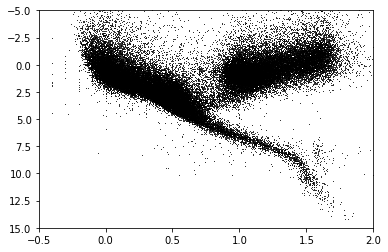

In [24]:
scatter(star_colors, star_magnitudes, s=1,
             c=(0, 0, 0), linewidths=0)
axis(hr_axes)

In [25]:
star_rgbs = [
    color_chart[paren(spectral_class)]
    for spectral_class in star_spectra
    ]

[-0.5, 2, 15, -5]

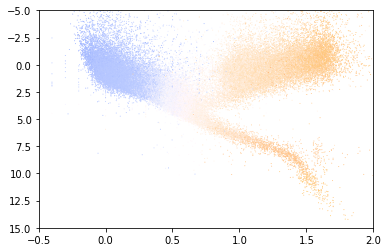

In [26]:
scatter(star_colors, star_magnitudes, s=1,
        c=star_rgbs, linewidths=0.0)
axis(hr_axes)

In [27]:
hr_range = [[-5, 15], [-0.5, 2]]

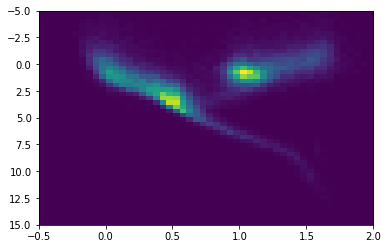

In [28]:
heatmap, yedges, xedges = histogram2d(
    star_magnitudes, star_colors, bins=50,
    range=hr_range)

extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
imshow(heatmap, aspect=0.08, extent=extent)

In [29]:
heatmap[10][10]

119.0

In [30]:
from matplotlib.cm import get_cmap

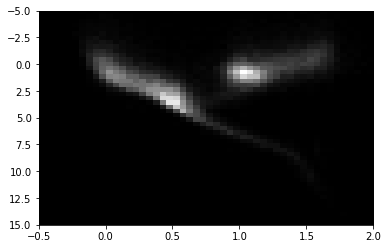

In [31]:
imshow(heatmap, cmap=get_cmap('gray'),
       aspect=0.08, extent=extent)

What if we want some color?

In [33]:
colorgrid = zeros((50, 50, 3))

ymin, ymax, xmin, xmax = -5, 15, -0.5, 2
y_range = ymax - ymin
x_range = xmax - xmin

for i in range(len(stars2)):
    xbin = 50.0 * (star_colors[i] - xmin) / x_range
    ybin = 50.0 * (star_magnitudes[i] - ymin) / y_range

    if not 0.0 <= xbin < 50.0:
        continue
    if not 0.0 <= ybin < 50.0:
        continue

    xbin = int(xbin)
    ybin = int(ybin)
    color = color_chart[paren(star_spectra[i])]
    colorgrid[ybin][xbin] += color

print (heatmap[10][10])
print (colorgrid[25][20:25])
colorgrid /= colorgrid.max()
print (colorgrid[25][20:25])

119.0
[[  0.95686275   0.94509804   1.        ]
 [  9.           8.67843137   8.61176471]
 [ 64.          61.52156863  60.37647059]
 [165.97254902 159.00784314 154.36862745]
 [172.89803922 164.78823529 158.66666667]]
[[0.00140565 0.00138837 0.00146902]
 [0.01322119 0.0127488  0.01265086]
 [0.09401734 0.09037647 0.0886943 ]
 [0.24381715 0.23358585 0.22677075]
 [0.25399084 0.24207737 0.23308466]]


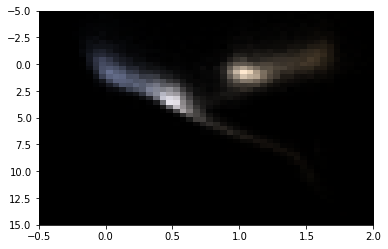

In [34]:
imshow(colorgrid, aspect=0.08, extent=extent)

/home/mlares/python3_VE/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


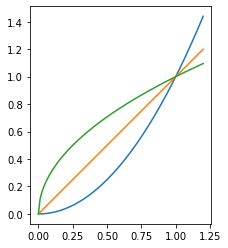

In [35]:
x = linspace(0.0, 1.2, 100)
plot(x, x ** 2)
plot(x, x)
plot(x, x ** 0.5)
axes().set_aspect(1.0)

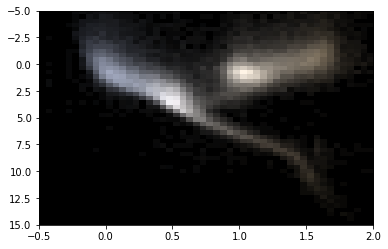

In [36]:
plot = plt.figure().add_subplot(111)
plot.imshow(colorgrid ** 0.5, aspect=0.08,
            extent=extent)